In [193]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

In [194]:
df = pd.read_csv("forestfires.csv")

In [195]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0


In [196]:
df.shape

(517, 13)

## Analyzing Important Parameters

### Rain


In [197]:
#df['rain'].value_counts()

Since Out of 517 --> 509 rows are 0.0 in the rains column. So no use in using it as feature.

In [198]:
#df = df.drop('rain',axis=1)

### Variations with respect to the area


In [199]:
df.month = pd.to_datetime(df.month+df.day,format='%b%a')
from time import strftime
df.month = df.month.apply(lambda x:x.strftime('%m'))

In [200]:
#Removing areas above 300 as only 2 exist
#df = df[df.area<100]

In [201]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,03,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,03,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,03,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


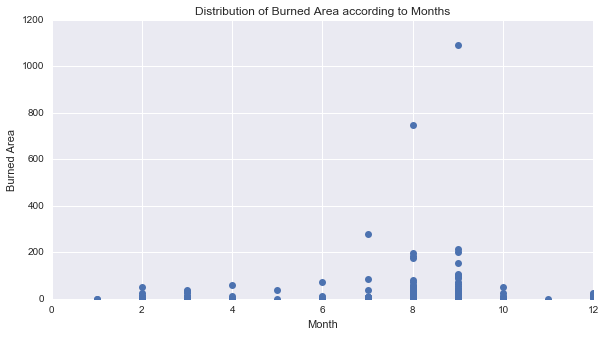

In [202]:

fig = plt.figure(figsize = (15,5))
#Burned Area Vs Month 
plt.subplot2grid((2,3),(0,0),colspan=2,rowspan=2)
plt.plot(df.month,df.area,'o')
plt.title("Distribution of Burned Area according to Months")
plt.xlabel("Month")
plt.ylabel("Burned Area")







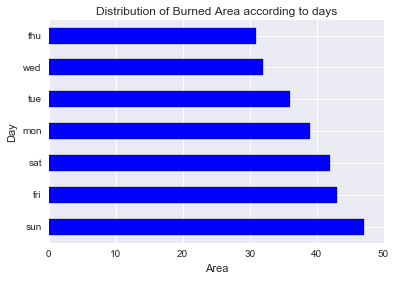

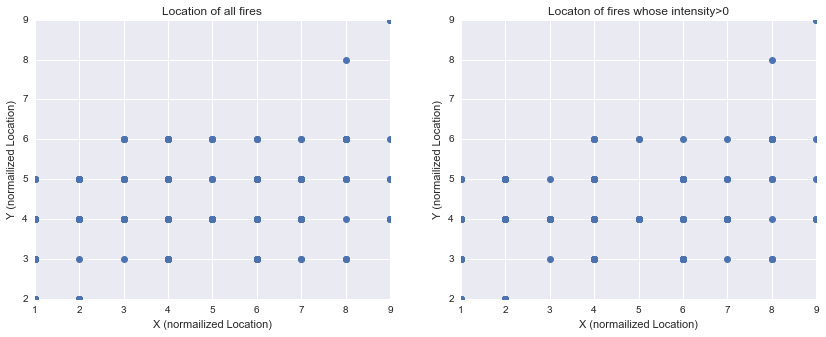

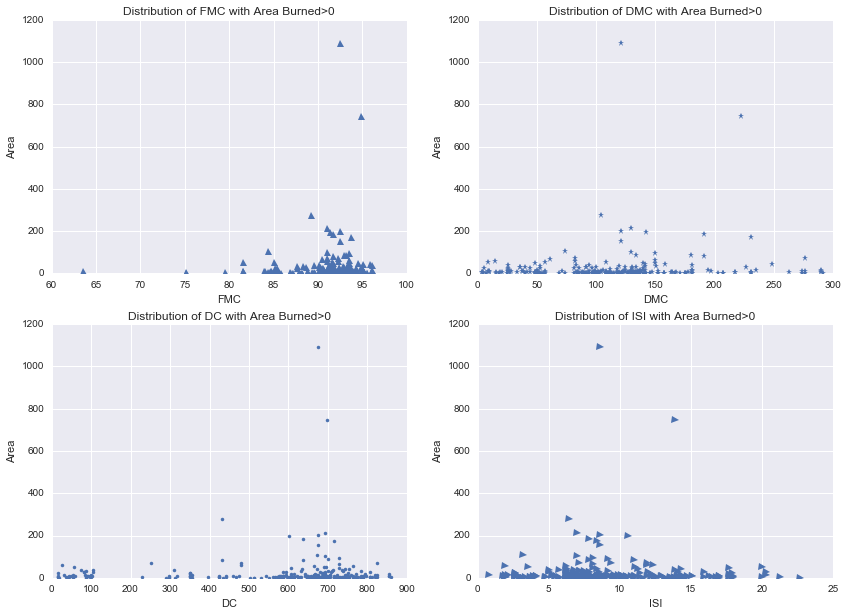

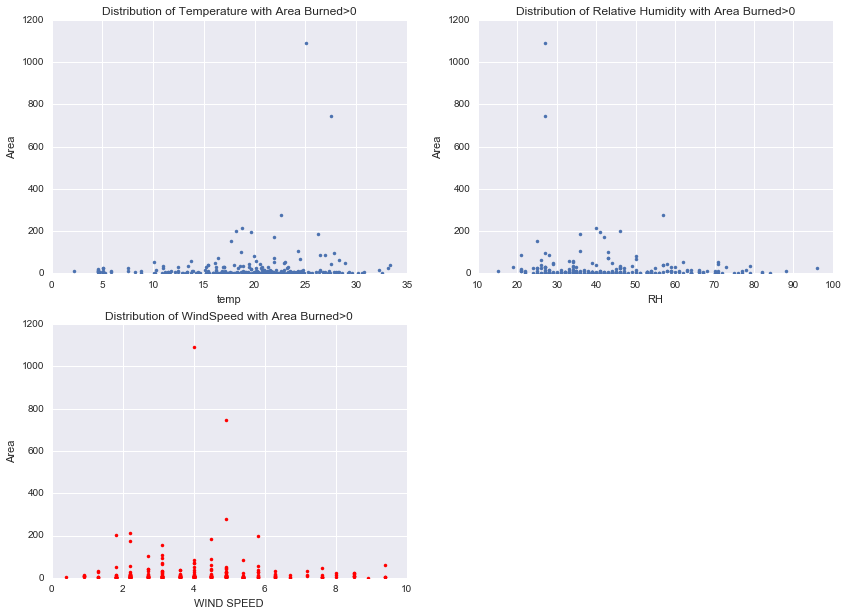

In [203]:
#Day vs Burned Area
df.day[df.area>0].value_counts().plot(kind='barh')
plt.title("Distribution of Burned Area according to days")
plt.xlabel("Area")
plt.ylabel("Day")


#Subplots based on Locations 
fig = plt.figure(figsize = (14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(df.X,df.Y,'o')
plt.title("Location of all fires")
plt.xlabel('X (normailized Location)')
plt.ylabel('Y (normailized Location)')
plt.subplot2grid((1,2),(0,1))
plt.plot(df.X[df.area>0],df.Y[df.area>0],'o')
plt.title("Locaton of fires whose intensity>0")
plt.xlabel('X (normailized Location)')
plt.ylabel('Y (normailized Location)')



#SUBPLOT 1 For Distribution 
fig = plt.figure(figsize = (14,10))
plt.subplot2grid((2,2),(0,0))
plt.plot(df.FFMC[df.area>0],df.area[df.area>0],'^')
plt.title("Distribution of FMC with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("FMC")

plt.subplot2grid((2,2),(0,1))
plt.plot(df.DMC[df.area>0],df.area[df.area>0],'*')
plt.title("Distribution of DMC with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("DMC")

plt.subplot2grid((2,2),(1,0))
plt.plot(df.DC[df.area>0],df.area[df.area>0],'.')
plt.title("Distribution of DC with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("DC")

plt.subplot2grid((2,2),(1,1))
plt.plot(df.ISI[df.area>0],df.area[df.area>0],'>')
plt.title("Distribution of ISI with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("ISI")

#SUBPLOT2 OF Distribution
fig = plt.figure(figsize = (14,10))
plt.subplot2grid((2,2),(0,0))
plt.plot(df.temp[df.area>0],df.area[df.area>0],'.')
plt.title("Distribution of Temperature with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("temp")

plt.subplot2grid((2,2),(0,1))
plt.plot(df.RH[df.area>0],df.area[df.area>0],'.')
plt.title("Distribution of Relative Humidity with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("RH")

plt.subplot2grid((2,2),(1,0))
plt.plot(df.wind[df.area>0],df.area[df.area>0],'.',color='red')
plt.title("Distribution of WindSpeed with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("WIND SPEED")




## Conclusion From the Visualization

1)There are some outliers with huge area majorly above 600 it has been removed.<br>

2)Also for area above 100 there only exist about 9 points which is a again an outlier but keeping it for time being 


In [204]:
df = df.drop('day',axis=1)
df = df.drop('month',axis=1)



In [205]:
#df.drop('rain',axis=1);

In [206]:
df = df[df.area>0]

In [207]:
df.shape

(270, 11)

# Ensemble Learning Techniques

In [208]:
main_arr = np.array(df,dtype='float64')
X = main_arr[:,1:10]
Y = main_arr[:,10:11]
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.4, random_state=0)


## Random Forest Regressor

In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [210]:
regr_1 = DecisionTreeRegressor()

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(),
                          n_estimators=100)
regr_3 = RandomForestRegressor( n_estimators=100)
regr_4 = regr_2 = AdaBoostRegressor(RandomForestRegressor( n_estimators=100),
                          n_estimators=100)

In [211]:
regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)
regr_3.fit(X_train, Y_train)
regr_4.fit(X_train, Y_train)
# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

/home/thakursc1/anaconda3/lib/python3.4/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thakursc1/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/home/thakursc1/anaconda3/lib/python3.4/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [212]:
from sklearn.metrics import explained_variance_score

In [213]:
explained_variance_score(y_1,Y_test)

-0.096400900658175637

In [214]:
explained_variance_score(y_2,Y_test)

-0.49861176465995727

In [215]:
explained_variance_score(y_3,Y_test)

-0.50180137320817653

In [216]:
explained_variance_score(y_4,Y_test)

-0.49861176465995727